# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение файла с данными 

In [4]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# Читаем данные из csv-файла в датафрейм и сохраним в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [6]:
# Изучим общую информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# Выведем первые 10 строк датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


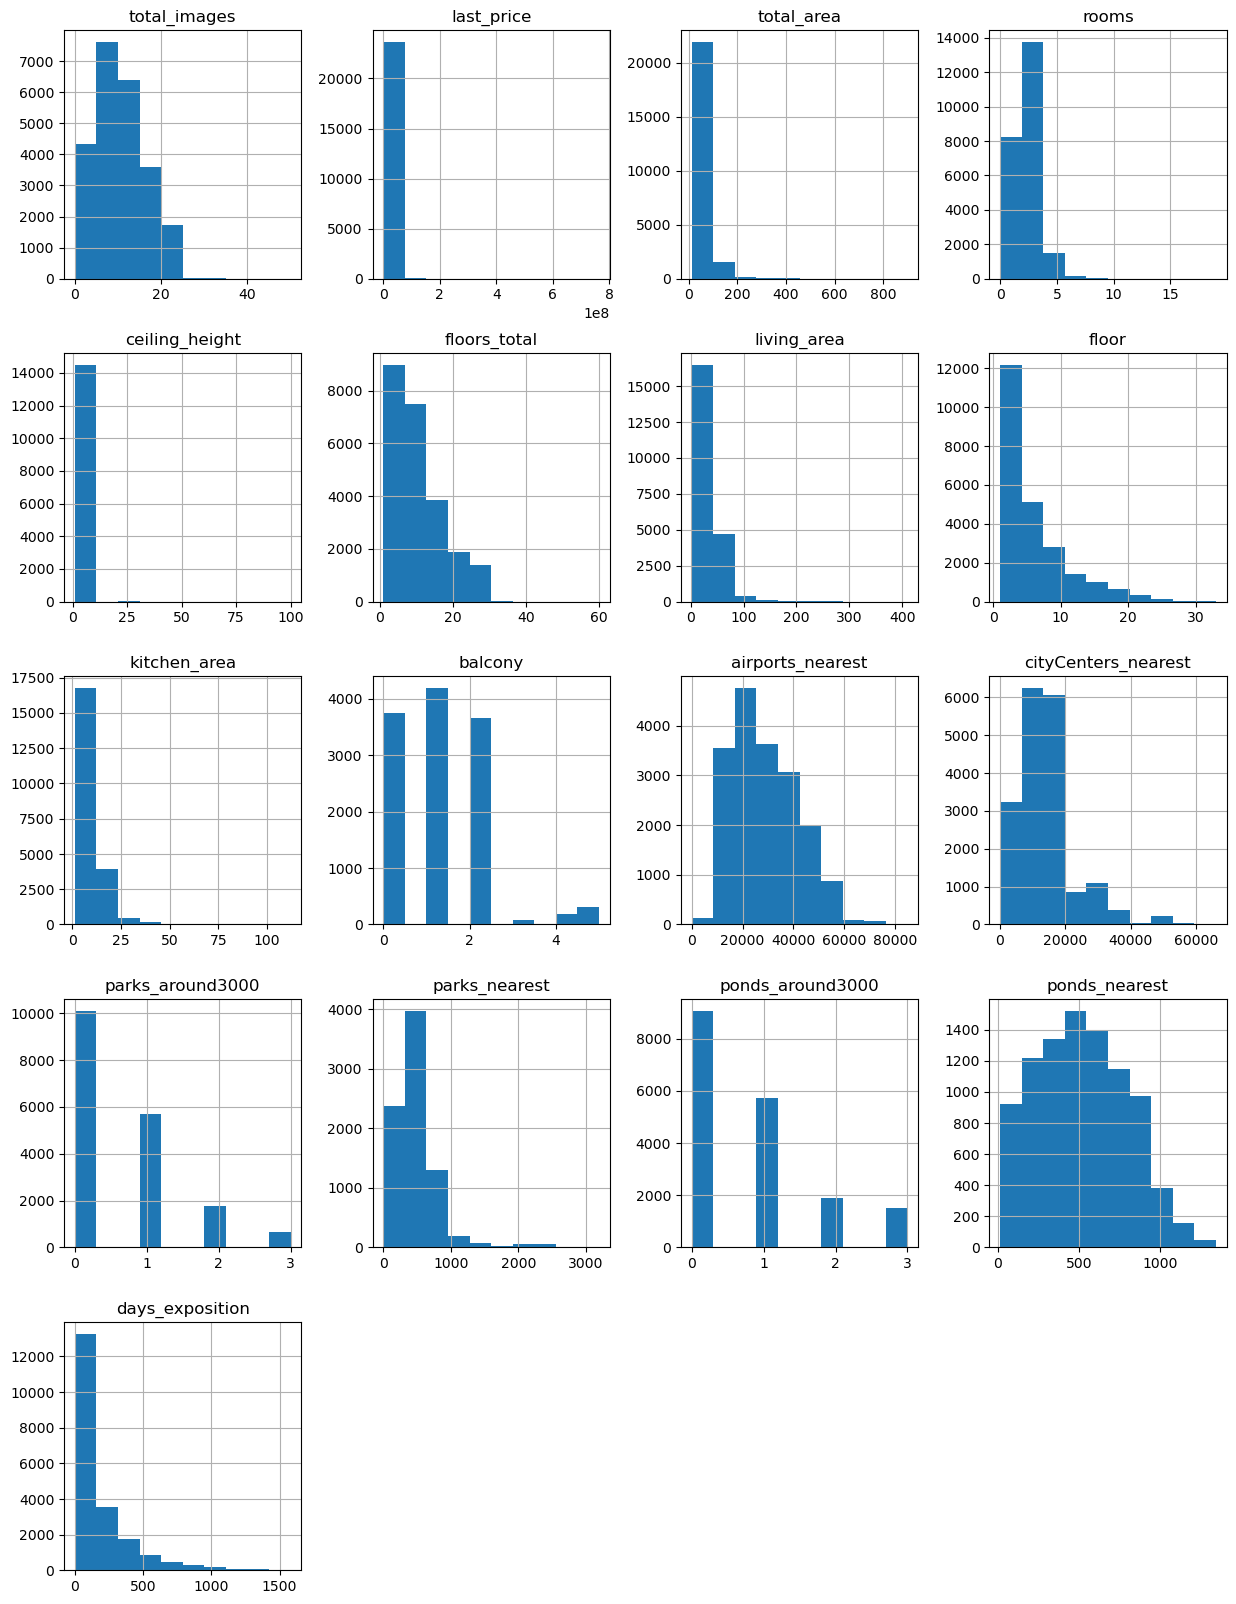

In [8]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

В таблице 22 столбца и 23699 строк. В некоторых столбцах есть пропущенные значения и некорректный тип данных. 



### Предобработка данных

#### Работа с пропущенными значениями в столбцах

In [9]:
# Выведем количество пропущенных значений для каждого столбца
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть во многих столбцах, но не везде их можно будет заполнить. Пропуски в 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'locality_name', 'is_apartment', 'balcony' заполняются пользователями сайта самостоятельно и могут быть не заполнены в силу человеческого фактора, возможно кто-то не сочел эту информацию важной или просто поленился заполнять эти данные. Пропуски в 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'airports_nearest ', 'cityCenters_nearest' возможны из-за сбоя в работе сайта или выгрузке, т.к. являются картографическими и заполняются автоматически при указании информации в столбце 'locality_name'.  Данные в 'days_exposition' должны заполняются автоматически, поэтому пропуски здесь могут означать, что объявление не снято с публикации и до сих пор актуально. Заполним пропущенные значения там, где это возможно.

Пропуски в столбце 'balcony' скорее всего означают отсутсвие балкона, поэтому пропуски можно заменить нулем. 

In [10]:
data['balcony'] = data['balcony'].fillna(value=0)

Пропуски в столбцах 'parks_around3000' и 'ponds_around3000' тоже можгут означать отсутсвие парков или прудов по близости. Заменим эти значения нулем.

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Пропуски в столбце 'ceiling_height' можно заполнить медианным значением.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

Пропуски в столбце 'is_apartment' можно заполнить False.

In [13]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [14]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

В столбцах 'floors_total' и 'locality_name' пропущенных значений немного, поэтому их можно удалить. 

In [15]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

Для заполнения пропусков в столбце 'living_area' посчитаем соотношением медианной общей площади к медианной жилой. А затем, заполним пропуски в столбце отношением общей площади к найденному соотношению.

In [16]:
ratio_living_area = data['total_area'].median() / data['living_area'].median()
data['living_area'].fillna(data['total_area'] / ratio_living_area, inplace=True)

Для заполнения пропусков в столбце 'kitchen_area' посчитаем соотношением медианной общей площади к медианной площади кухни. А затем, заполним пропуски в столбце отношением общей площади к найденному соотношению.

In [17]:
ratio_kitchen_area = data['total_area'].median() / data['kitchen_area'].median()
data['kitchen_area'].fillna(data['total_area'] / ratio_kitchen_area, inplace=True)

Пропуски в столбцах 'parks_nearest', 'ponds_nearest', 'airports_nearest ', 'cityCenters_nearest' заполнить не получится. Оставим эти столбцы без изменений.

In [18]:
# Проверим количество пропущенных значений для каждого столбца повторно
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

 #### Работа с типами данных

Найдём столбцы, в которых нужно изменить тип данных. 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбцы 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' должны иметь целые значения, а не дробные. Данным столбцам можно присвоить тип данных int. 
Столбец 'first_day_exposition' надо привести к типу данных datetime, чтобы он был читабельнее и с ним было удобно работать потом.




In [20]:
# Приводим к типу datetime дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [21]:
# Приводим в целочисленному типу 'last_price'
data['last_price'] = data['last_price'].astype('int')

In [22]:
# Приводим в целочисленному типу количество балконов
data['balcony'] = data['balcony'].astype('int')

In [23]:
# Приводим в целочисленному типу количество этажей
data['floors_total'] = data['floors_total'].astype('int');

In [24]:
# Приводим в целочисленному типу количество парков
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [25]:
# Приводим в целочисленному типу количество прудов
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [27]:
# Select columns with 'float64' dtype
float64_cols = list(data.select_dtypes(include='float64'))
# The same code again calling the columns
data[float64_cols] = data[float64_cols].astype('float32')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float32       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float32       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float32       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float32       
 13  balcony         

#### Работа с уникальными значениями в столбце 'locality_name' и устранение неявных дубликатов

Изучим уникальные значения в столбце 'locality_name'

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посчитаем количество уникальных значений для 'locality_name'

In [31]:
len(data['locality_name'].unique())

364

В столбце 'locality_name' есть дубликаты. Исключим их и приведем все названия к строчному регистру.

In [32]:
# Заменим однотипные названия
data['locality_name'] = data['locality_name'].replace('городской посёлок', 'поселок городского типа', regex=True)

In [33]:
# Заменим однотипные названия
data['locality_name'] = data['locality_name'].replace('посёлок станции', 'поселок при железнодорожной станции', regex=True)

In [34]:
# Заменим букву 'ё' на 'е' во всех названиях
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [35]:
# Приведем все названия к строчному регистру
data['locality_name'] = data['locality_name'].str.lower()

In [36]:
# Выедем количество уникальных значений
len(data['locality_name'].unique())

325

Мы уменьшили количество неявных дубликатов, привели все названия к строчному регистру, т.о. уменьшилось количество уникальных значений в столбце  'locality_name' 

#### Устраниние редких и выбивающихся значений

Найдём и удалим редкие и выбивающиеся значения по каждому столбцу. Проработаем аномалии в данных.

*  Столбец 'total_images' 

In [37]:
data['total_images'].describe()

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.

*  Столбец 'last_price' 

In [38]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

С максимальной ценой всё в порядке. Минимальную цену объектов недвижимости надо проверить.

In [39]:
data.sort_values(by = 'last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.000000,2019-03-20,2,2.75,25,32.000000,25,False,...,40.50,0,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
17456,7,430000,30.400000,2019-04-22,1,2.65,2,16.000000,1,False,...,6.00,0,сланцы,NaN,NaN,0,NaN,0,NaN,NaN
14911,5,430000,54.000000,2018-06-26,2,2.65,3,31.153847,3,False,...,9.45,0,поселок при железнодорожной станции свирь,NaN,NaN,0,NaN,0,NaN,44.0
16274,18,440000,40.000000,2018-07-10,1,2.65,5,23.076923,1,False,...,7.00,0,деревня старополье,NaN,NaN,0,NaN,0,NaN,45.0
9581,7,450000,43.400002,2018-08-31,2,2.65,5,30.299999,3,False,...,5.50,0,деревня старополье,NaN,NaN,0,NaN,0,NaN,96.0


В столбце 'last_price' есть цена 12190 за квартиру в Санкт-Петербурге 109 кв м. Это похоже ны выброс. Эту строчку можно удалить.

In [40]:
data.drop(index=data.query('last_price < 13000').index,inplace=True)

In [41]:
data['last_price'].describe()

count    2.356400e+04
mean     6.540335e+06
std      1.091108e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

*  Столбец 'total_area' 

In [42]:
data['total_area'].describe()

count    23564.000000
mean        60.320759
std         35.656376
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64

In [43]:
data.sort_values(by = 'total_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19,1,2.55,5,10.000000,2,False,...,2.1000,0,санкт-петербург,21314.0,964.0,1,886.0,2,45.0,200.0
19546,3,1850000,13.0,2019-03-11,1,3.40,5,7.500000,2,False,...,2.2750,0,санкт-петербург,24915.0,5483.0,1,644.0,0,NaN,24.0
17961,3,1400000,13.0,2017-12-03,1,2.60,9,7.500000,1,False,...,2.2750,0,санкт-петербург,14350.0,15945.0,0,NaN,1,185.0,410.0
19807,0,3800000,13.0,2018-07-04,1,2.65,5,10.000000,3,False,...,2.2750,0,санкт-петербург,21302.0,1242.0,1,592.0,3,27.0,9.0
19558,2,1686000,13.2,2018-12-17,1,2.65,5,7.615385,1,False,...,2.3100,0,санкт-петербург,19891.0,4165.0,1,361.0,1,155.0,19.0
19642,5,1190000,14.0,2018-07-29,1,2.65,5,11.000000,1,False,...,2.0000,0,санкт-петербург,9898.0,11122.0,0,NaN,0,NaN,4.0
12040,5,1900000,15.0,2018-06-27,1,2.50,5,8.653846,1,False,...,2.6250,0,сосновый бор,NaN,NaN,0,NaN,0,NaN,45.0
16949,9,1550000,15.0,2018-08-21,1,2.70,9,8.653846,1,False,...,2.6250,0,санкт-петербург,51048.0,16376.0,0,NaN,1,1079.0,42.0
8886,10,2450000,15.5,2018-08-22,0,2.65,5,10.000000,2,False,...,2.7125,0,санкт-петербург,24326.0,4589.0,0,NaN,1,446.0,27.0
9412,5,2100000,16.0,2017-12-10,0,2.65,6,13.000000,1,False,...,2.8000,0,санкт-петербург,20735.0,2111.0,2,228.0,3,72.0,3.0


Максимальные и минимальные значения выглядят вполне реально. Квартиры с общей площадью 12-15 кв м действительно существуют, все остальные показатели выглядят правдоподобно. Максимальная площадь равна 900 кв м - это похоже на элитную недвижимость. 
Оставляем 'total_area' столбец без изменений.

*  Столбец 'rooms'

In [44]:
data['rooms'].describe()

count    23564.000000
mean         2.070659
std          1.078613
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Есть значения равные нулю. Их можно проверить. Возможно так могут обозначаться квартиры с открытой планировкой или студии.

In [45]:
data.query('rooms == 0 & open_plan')['rooms'].count() 

59

In [46]:
data.query('rooms == 0 & studio')['rooms'].count()

135

Действительно такая взаимосвязь присутствует, поэтому оставляем значение 0 в столбце 'rooms' без изменений. 

In [47]:
data.sort_values(by = 'rooms', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.600006,2018-06-09,19,2.65,5,264.500000,2,False,...,27.6,0,санкт-петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000,270.000000,2015-03-02,16,3.00,4,180.000000,4,False,...,13.0,1,санкт-петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
5358,20,65000000,590.000000,2019-02-14,15,3.50,6,409.000000,3,False,...,100.0,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
866,5,25000000,363.000000,2017-12-23,14,3.16,5,222.000000,4,False,...,16.6,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
20829,6,28659000,245.399994,2016-03-31,14,2.65,4,168.300003,2,False,...,25.9,0,санкт-петербург,21104.0,2054.0,3,541.0,2,118.0,95.0


Максимальное количество 19 комнат характерно для элитной недвижимости. Оставим эту строку без изменений. 

*  Столбец 'ceiling_height'

Для проверки аномальных значений в этом столбце можно проверить все уникальные значения.

In [48]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [49]:
data['ceiling_height'].describe()

count    23564.000000
mean         2.724529
std          0.991078
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце 'ceiling_height' есть значения 20м-32м. Скорее всего это невнимательность пользователя при заполнениина и на самом деле это могут быть вещественные значения: 2.0м-3.2 м. Поэтому их можно исправить. Также есть одно значение 100м, исправить не получится,  поэтому такое значение можно удалить.

In [50]:
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

In [51]:
data.update(data[data['ceiling_height'] >= 20]['ceiling_height']/10)

In [52]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

* Столбец 'floors_total'

Для проверки аномальных значений в этом столбце можно проверить все уникальные значения.


In [53]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

Есть дома с этажностью выше 30 этажей. Такие значения надо проверить. По результам яндекс-поиска самое высокое жилое здание в Санкт-Петербурге ЖК "Князь Александр Невский" и насчитывает 37 этажей. Поэтому дома этажностью выше можно удалить из таблицы, их всего два - 52 и 60 этажей.

In [54]:
data.drop(index=data.query('floors_total > 37').index,inplace=True)

In [55]:
data.sort_values(by = 'floors_total', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.340000,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
11079,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,12.000000,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,NaN
397,15,5990000,54.0,2018-03-22,2,2.65,36,21.4,28,False,...,18.700001,1,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,11.0
5807,17,8150000,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,12.000000,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
5808,12,4590000,43.0,2018-10-19,1,2.65,35,14.0,11,False,...,15.000000,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,82.0


*  Столбец 'living_area'

In [56]:
data['living_area'].describe()

count    23561.000000
mean        34.623425
std         22.400620
min          2.000000
25%         19.000000
50%         30.000000
75%         42.115383
max        409.700012
Name: living_area, dtype: float64

In [57]:
data.query('living_area < 10')['living_area'].count()

31

Есть квартиры с жилой площадью 2 кв м. Квартиры с жилой площадью менее 10 кв м появились скорее всего в результате некорректного заполнения данных пользователями. Исправить их нельзя, поэтому лучше удалить.

In [58]:
data.drop(index=data.query('living_area < 10').index,inplace=True)

In [59]:
data['living_area'].describe()

count    23530.000000
mean        34.659149
std         22.393785
min         10.000000
25%         19.000000
50%         30.000000
75%         42.193270
max        409.700012
Name: living_area, dtype: float64

*  Столбец 'floor'

In [60]:
data['floor'].describe()

count    23530.000000
mean         5.875733
std          4.867266
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Значения в этом столбце выглядят правдоподобно, нет значений свыше 37. Оставим столбец 'floor' без изменений.

* Столбец 'kitchen_area'

In [61]:
data['kitchen_area'].describe()

count    23530.000000
mean        10.493903
std          6.026913
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В этом столбце минимальное значение 1.3 кв м. Возможно такие значения могут встречаться в квартирах с открытой планировкой или студиях. Проверим такую возможность. 

In [62]:
data.query('kitchen_area < 2 & (open_plan or studio)')['kitchen_area'].count() 

0

Теория не подтвердилась. Выведем строку на экран и оценим данные.

In [63]:
pd.set_option('display.max_columns', None)
data.query('kitchen_area < 2').head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000,28.5,2019-05-01,1,2.8,14,19.5,10,False,False,False,1.3,0,санкт-петербург,37199.0,12721.0,0,NaN,0,NaN,NaN


Данные по квартире с 'kitchen_area' 1.3 кв м выглядят правдоподобно, поэтому не будем удалять эту строку.

*  Столбец 'balcony'

In [64]:
data['balcony'].describe()

count    23530.000000
mean         0.593753
std          0.960517
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.

*  Столбец 'airports_nearest'

In [65]:
data['airports_nearest'].describe()

count    18008.000000
mean     28793.873047
std      12633.388672
min          0.000000
25%      18555.750000
50%      26752.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [66]:
data.sort_values(by = 'airports_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.700001,2018-09-23,1,2.70,9,19.799999,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0
4017,7,2268000,35.000000,2017-12-21,1,2.65,9,14.000000,6,False,False,False,8.0,0,санкт-петербург,6450.0,17461.0,0,NaN,1,444.0,25.0
12899,8,4199000,56.000000,2017-12-21,2,2.65,9,27.000000,5,False,False,False,15.0,0,санкт-петербург,6450.0,17461.0,0,NaN,1,444.0,24.0
7778,9,2750000,29.000000,2017-02-19,1,2.50,4,15.000000,1,False,False,False,6.0,0,санкт-петербург,6914.0,21486.0,1,215.0,0,NaN,43.0
23150,3,6490000,62.500000,2015-03-18,2,2.65,24,33.500000,15,False,False,False,9.0,4,санкт-петербург,6949.0,13165.0,1,711.0,0,NaN,917.0


Минимальное значение в столбце 'airports_nearest' равно 0. Получается, что квартира находится в аэропорту. Значение заполнено некорректно. При этом в данная квартира находится в Санкт-Петербурге. Можно заполнить некорректное значение медианным значением расстояния от Санкт-Петербурга.

In [67]:
data.query('locality_name == "санкт-петербург"')['airports_nearest'].median()


26757.0

In [68]:
data['airports_nearest'] = data['airports_nearest'].replace(0, 26756.5)

In [69]:
data['airports_nearest'].describe()

count    18008.000000
mean     28795.359375
std      12631.564453
min       6450.000000
25%      18557.000000
50%      26753.500000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

*  Столбец 'cityCenters_nearest'

In [70]:
data['cityCenters_nearest'].describe()

count    18031.000000
mean     14194.571289
std       8612.436523
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16289.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Значения в этом столбце выглядят правдоподобно, расстояние 0 значит, что квартира находится в центре.Оставим столбец 'cityCenters_nearest' без изменений.

*  Столбец 'parks_around3000' 

In [71]:
data['parks_around3000'].describe()

count    23530.000000
mean         0.468508
std          0.748415
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.

*  Столбец 'parks_nearest'

In [72]:
data['parks_nearest'].describe()

count    8011.000000
mean      490.390472
std       341.354218
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.

*  Столбец 'ponds_around3000 '

In [73]:
data['ponds_around3000'].describe()

count    23530.000000
mean         0.589588
std          0.883682
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.


*  Столбец 'ponds_nearest'

In [74]:
data['ponds_nearest'].describe()

count    9019.000000
mean      518.185730
std       277.656403
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Все данные выглядят корректно. Оставим этот столбец без изменений.

*  Столбец 'days_exposition'

In [75]:
data['days_exposition'].min(), data['days_exposition'].max()

(1.0, 1580.0)

Все данные выглядят корректно. Оставим этот столбец без изменений.

### Добавление в таблицу новых столбцов

#### Добавим столбец цена одного квадратного метра

In [76]:
data['price_square_meter'] = round(data['last_price']/data['total_area'], 1)

#### Добавим столбец день недели публикации объявления

In [77]:
data['day'] = data['first_day_exposition'].dt.dayofweek

#### Добавим столбец месяц публикации объявления

In [78]:
data['month'] = data['first_day_exposition'].dt.month

#### Добавим столбец год публикации объявления

In [79]:
data['year'] = data['first_day_exposition'].dt.year

#### Добавим столбец с типом этажа квартиры

In [80]:
def type_floor(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(type_floor, axis=1)

#### Добавим столбец расстояние до центра города в километрах

In [81]:
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

*  Переименуем столбец 'cityCenters_nearest' в 'city_centers_nearest'

In [82]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'},  inplace=True)

In [83]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,type_floor,city_centers_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000,159.000000,2015-07-24,3,2.65,14,91.730766,9,False,False,False,27.825001,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Исследовательский анализ данных

#### Изучим следующие параметры объектов:
 
    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    этаж квартиры;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего аэропорта;
    расстояние до ближайшего парка;
    день и месяц публикации объявления.
Для этого построим гистограммы для каждого параметра отдельно.    

*  общая площадь

In [84]:
data['total_area'].describe()

count    23530.000000
mean        60.354164
std         35.660591
min         12.000000
25%         40.000000
50%         52.000000
75%         69.732498
max        900.000000
Name: total_area, dtype: float64

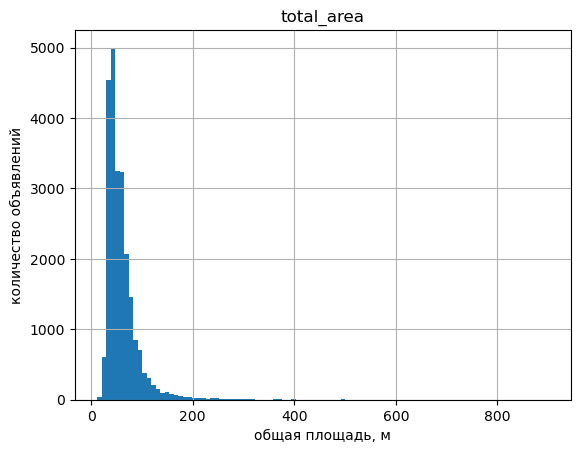

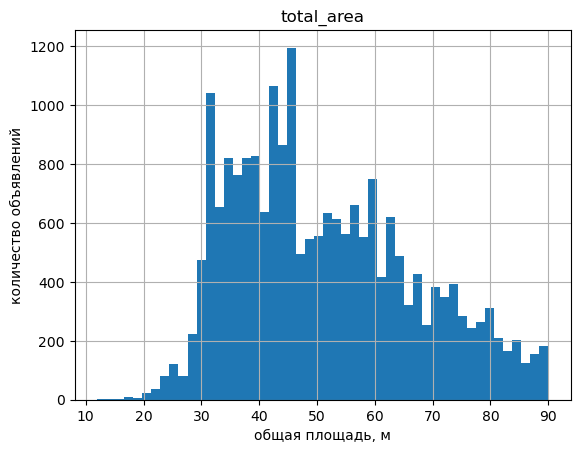

In [85]:
data.hist('total_area', bins=100)
plt.xlabel('общая площадь, м')
plt.ylabel('количество объявлений')

data.hist('total_area', bins=50, range=(12,90))
plt.xlabel('общая площадь, м')
plt.ylabel('количество объявлений');

Большинство объявлений по квартирам с общей площадью от 31 до 45 кв м. Также есть пик по квартирам 60 кв м.

*  жилая площадь

In [86]:
data['living_area'].describe()

count    23530.000000
mean        34.659149
std         22.393785
min         10.000000
25%         19.000000
50%         30.000000
75%         42.193270
max        409.700012
Name: living_area, dtype: float64

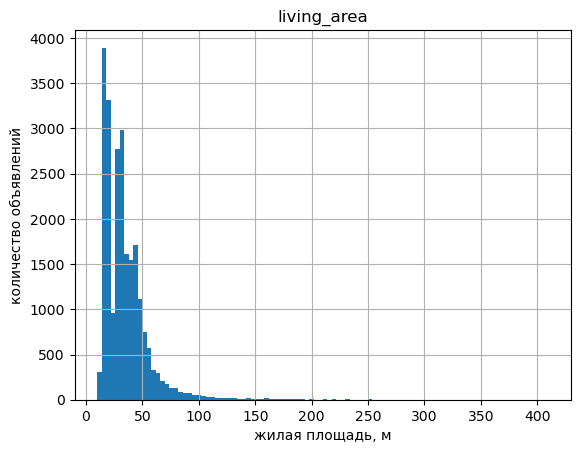

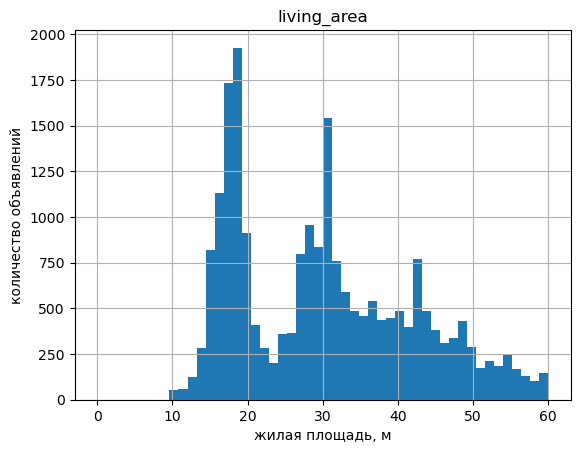

In [87]:
data.hist('living_area', bins=100)
plt.xlabel('жилая площадь, м')
plt.ylabel('количество объявлений')

data.hist('living_area', bins=50, range=(0,60))
plt.xlabel('жилая площадь, м')
plt.ylabel('количество объявлений');

Наблюдаем два пика - на 17-18 кв.м. и на 30 кв.м. Также есть большое количество объявлений по продаже квартир с жилой площадью 42 кв м

*  площадь кухни

In [88]:
data['kitchen_area'].describe()

count    23530.000000
mean        10.493903
std          6.026913
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

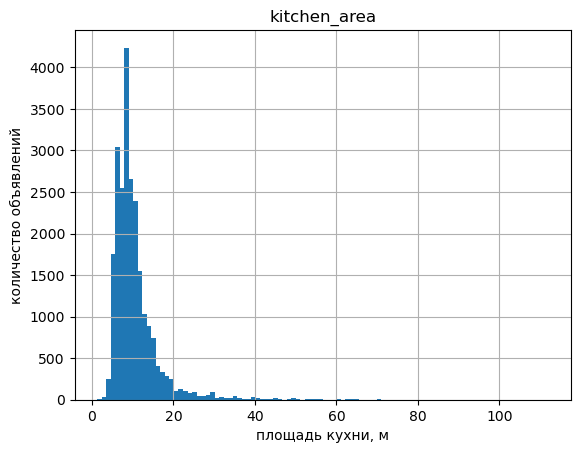

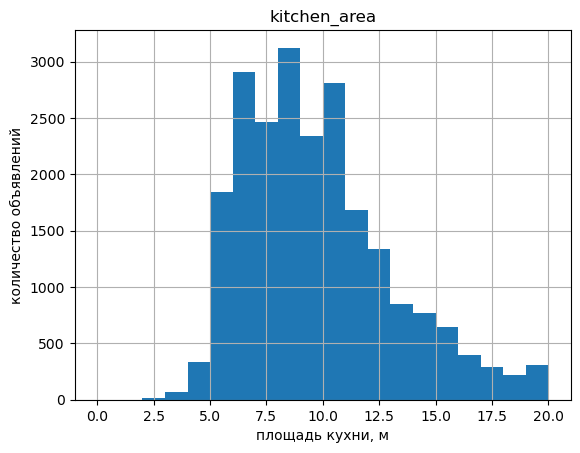

In [89]:
data.hist('kitchen_area', bins=100);
plt.xlabel('площадь кухни, м')
plt.ylabel('количество объявлений')

data.hist('kitchen_area', bins=20, range=(0,20))
plt.xlabel('площадь кухни, м')
plt.ylabel('количество объявлений');

Площадь кухни в объявлениях в основном от 5 до 11 кв м.

*  цена объекта

In [90]:
data['last_price'].describe()

count    2.353000e+04
mean     6.540760e+06
std      1.091161e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

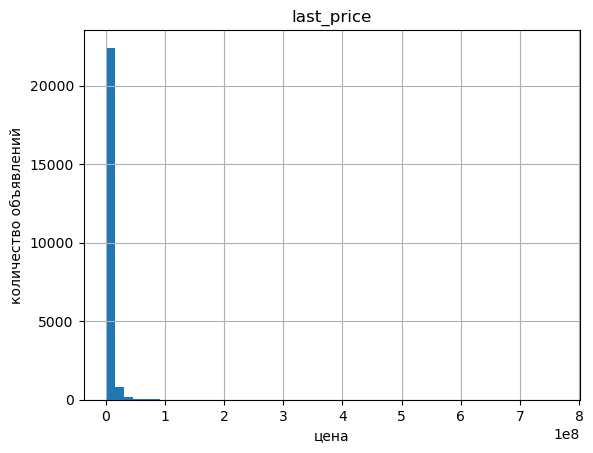

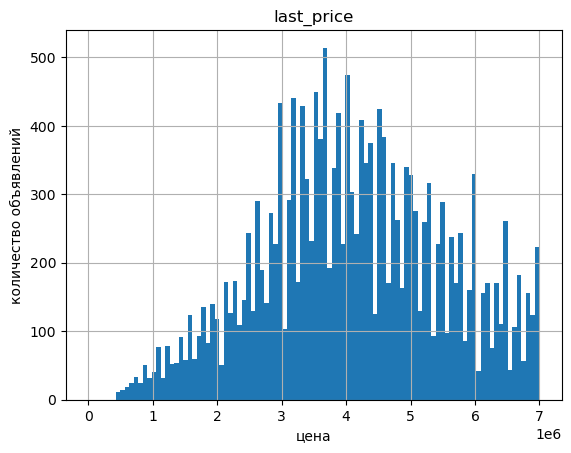

In [91]:
data.hist('last_price', bins=50)
plt.xlabel('цена')
plt.ylabel('количество объявлений')

data.hist('last_price', bins=100, range=(0,7_000_000))
plt.xlabel('цена')
plt.ylabel('количество объявлений');

Цена квартир в объявлениях в основном сосредотачивается в диапазоне от 2,5 до 6 мнл. При это наблюдаем пик на 6 млн.

*  количество комнат

In [92]:
data['rooms'].describe()

count    23530.000000
mean         2.071738
std          1.078635
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

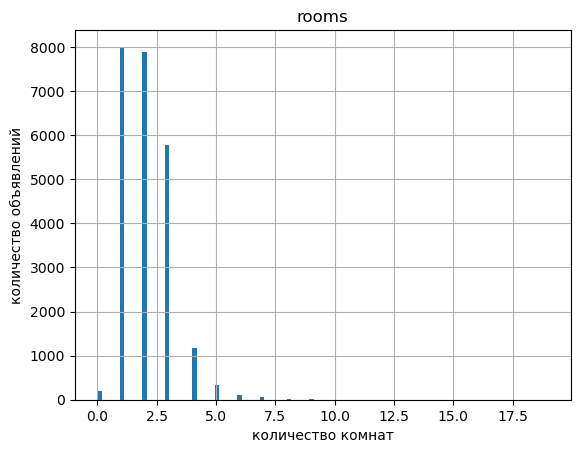

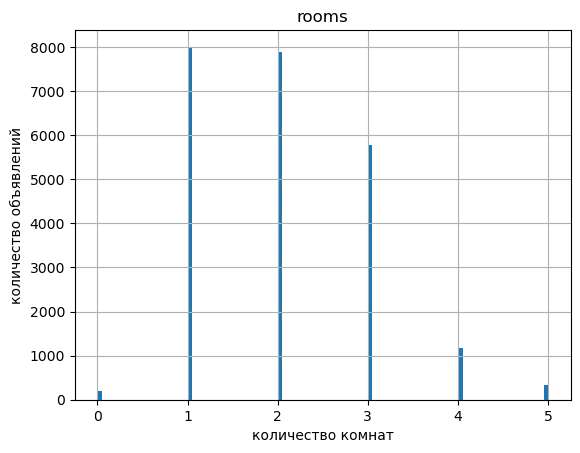

In [93]:
data.hist('rooms', bins=100)
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')

data.hist('rooms', bins=100, range=(0,5))
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений');

Больше всего одно-, двух- и трёхкомнатных квартир.

*  высота потолков

In [94]:
data['ceiling_height'].describe()

count    23530.000000
mean         2.698392
std          0.249178
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

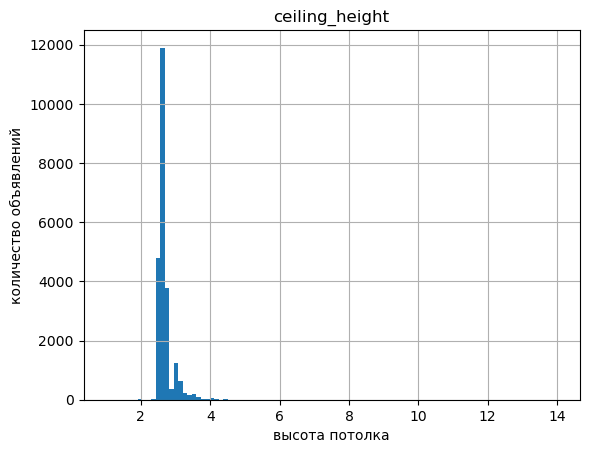

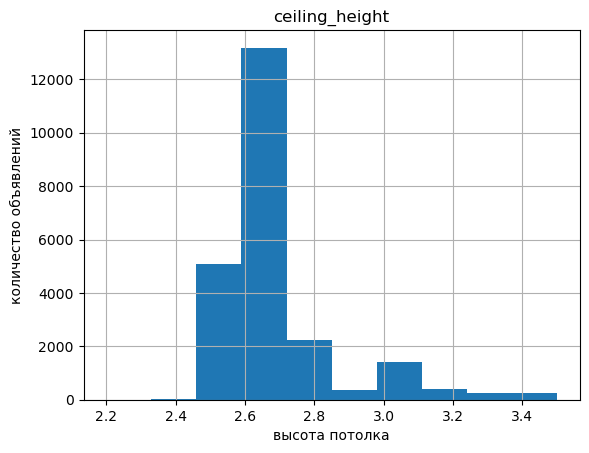

In [95]:
data.hist('ceiling_height', bins=100)
plt.xlabel('высота потолка')
plt.ylabel('количество объявлений')

data.hist('ceiling_height', bins=10, range=(2.2,3.5))
plt.xlabel('высота потолка')
plt.ylabel('количество объявлений');

Самое большое число объявлений о продаже квартир с высотой потолков 2,5-2,7 м.

*  этаж квартиры

In [96]:
data['floor'].describe()

count    23530.000000
mean         5.875733
std          4.867266
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

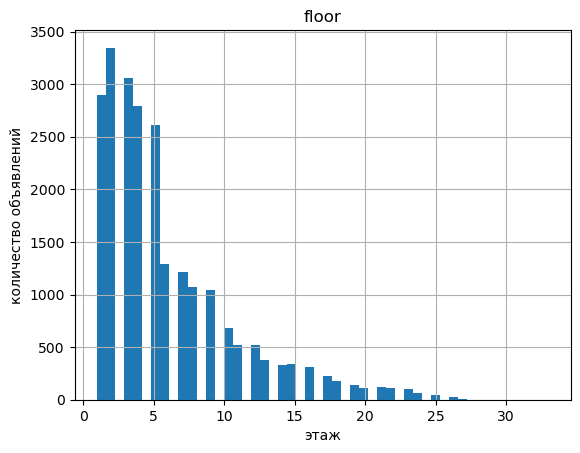

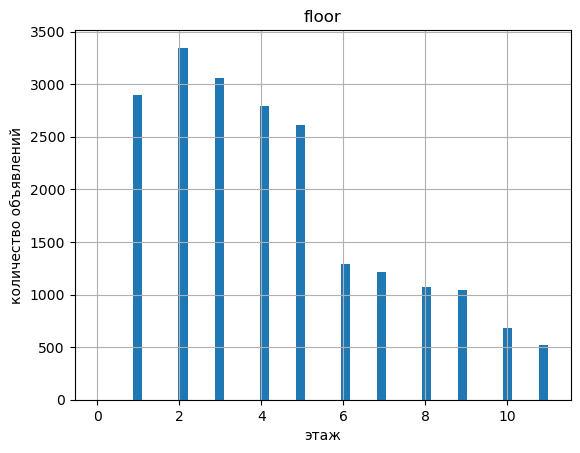

In [97]:
data.hist('floor', bins=50)
plt.xlabel('этаж')
plt.ylabel('количество объявлений')

data.hist('floor', bins=50, range=(0,11))
plt.xlabel('этаж')
plt.ylabel('количество объявлений');

В основном квартиры продаются на 1,2,3,4 и 5 этажах. Самый популярный 2 этаж.

*  тип этажа квартиры

In [98]:
data['type_floor'].describe()

count      23530
unique         3
top       другой
freq       17303
Name: type_floor, dtype: object

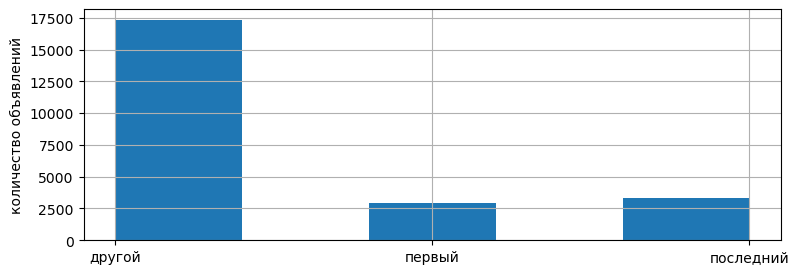

In [99]:
data['type_floor'].hist(bins=5, figsize=(9,3))

plt.ylabel('количество объявлений');

На первом и последнем этажах квартир меньше всего в объявлениях.

*  общее количество этажей в доме

In [100]:
data['floors_total'].describe()

count    23530.000000
mean        10.668933
std          6.579373
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

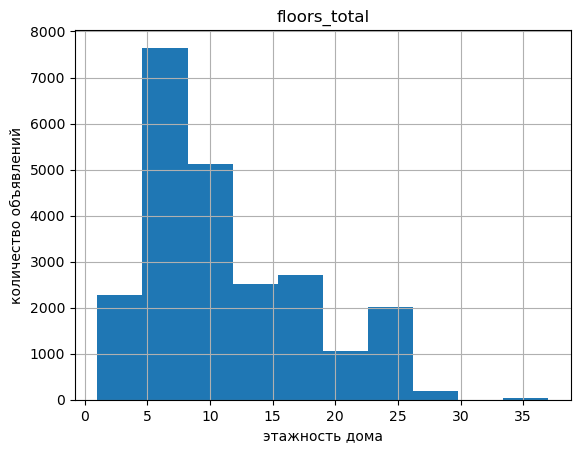

In [101]:
data.hist('floors_total', bins=10)
plt.xlabel('этажность дома')
plt.ylabel('количество объявлений');

Пик объявлений по продаже квартир в пятиэтажных и девятиэтажных домах. Таких домов больше всего.

*  расстояние до центра города в метрах

In [102]:
data['city_centers_nearest'].describe()

count    18031.000000
mean     14194.571289
std       8612.436523
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16289.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

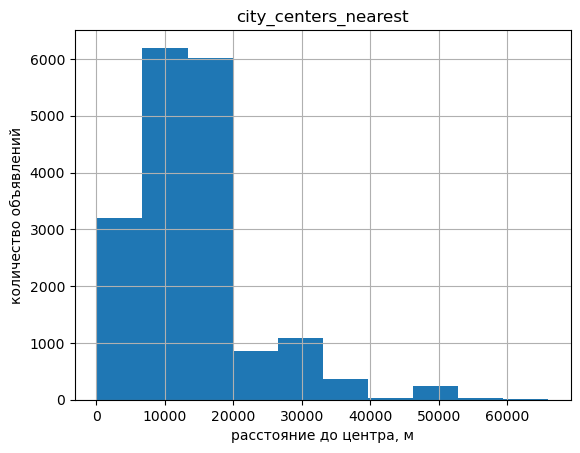

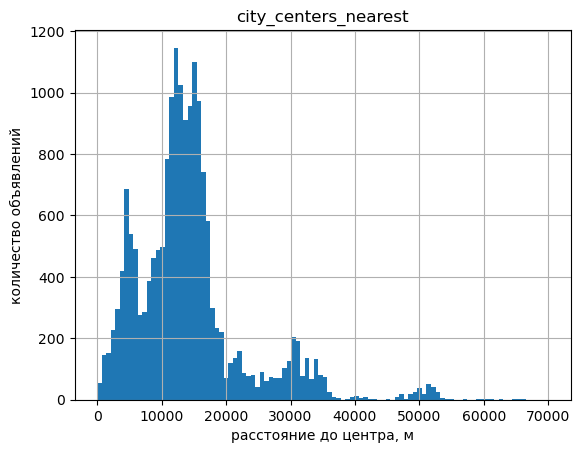

In [103]:
data.hist('city_centers_nearest', bins=10)
plt.xlabel('расстояние до центра, м')
plt.ylabel('количество объявлений')

data.hist('city_centers_nearest', bins=100, range=(0,70000))
plt.xlabel('расстояние до центра, м')
plt.ylabel('количество объявлений');

Большинство квартир в объявлениях расположены на расстоянии 10-17000 м. Здесь наблюдается несколько пиков. Скорее всего это указывает на неравномерность плотности жилой застройки.

*  расстояние до ближайшего аэропорта

In [104]:
data['airports_nearest'].describe()

count    18008.000000
mean     28795.359375
std      12631.564453
min       6450.000000
25%      18557.000000
50%      26753.500000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

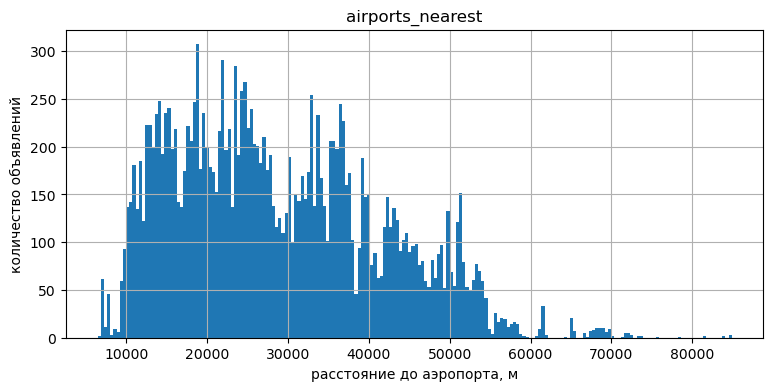

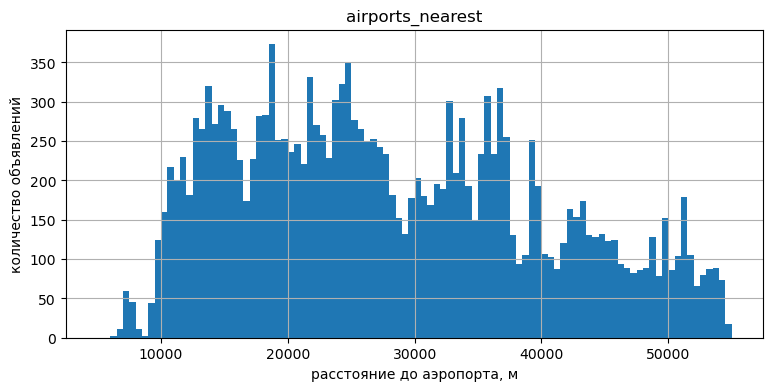

In [105]:
data.hist('airports_nearest', bins=200, figsize=(9,4))
plt.xlabel('расстояние до аэропорта, м')
plt.ylabel('количество объявлений')

data.hist('airports_nearest', bins=100, range=(5000,55000), figsize=(9,4))
plt.xlabel('расстояние до аэропорта, м')
plt.ylabel('количество объявлений');

Больше всего объявлений с расстоянием до аэропрта 15-25000 м и 35-38000 м.

*  расстояние до ближайшего парка

In [106]:
data['parks_nearest'].describe()

count    8011.000000
mean      490.390472
std       341.354218
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

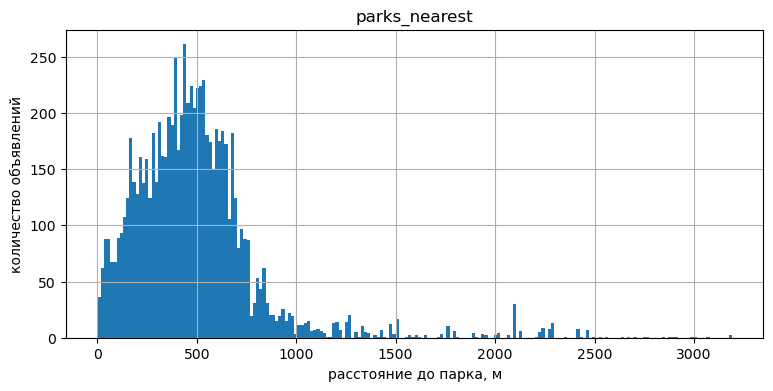

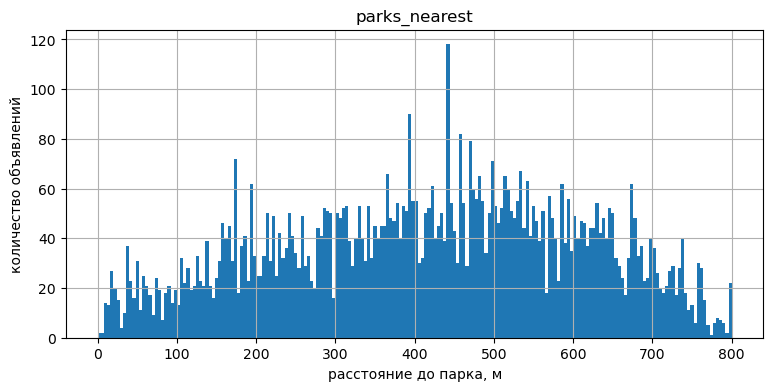

In [107]:
data.hist('parks_nearest', bins=200, figsize=(9,4));
plt.xlabel('расстояние до парка, м')
plt.ylabel('количество объявлений')

data.hist('parks_nearest', bins=200, range=(0,800), figsize=(9,4))
plt.xlabel('расстояние до парка, м')
plt.ylabel('количество объявлений');

Парки в пределах до 700 м от квартир в объвлениях. Это логично, парки, которые дальше, скорее всего указывают реже. 

*  день публикации объявления

In [108]:
data['day'].describe()

count    23530.000000
mean         2.567701
std          1.788045
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

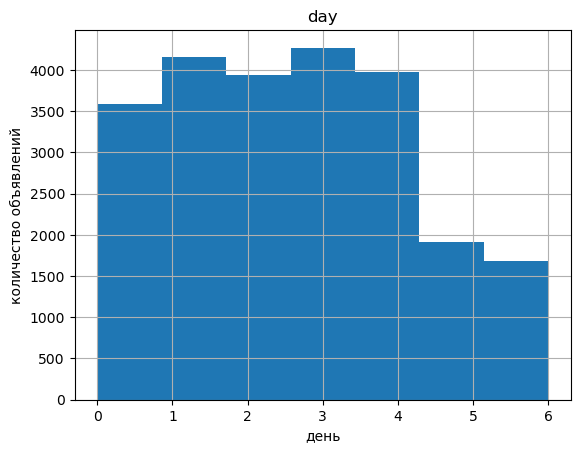

In [109]:
data.hist('day', bins=7)
plt.xlabel('день')
plt.ylabel('количество объявлений');

В основном объявления подаются среди недели в рабочие дни. Возможно это связано с графиком работы агенств недвижимости.

*  месяц публикации объявления

In [110]:
data['month'].describe()

count    23530.000000
mean         6.402720
std          3.492327
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

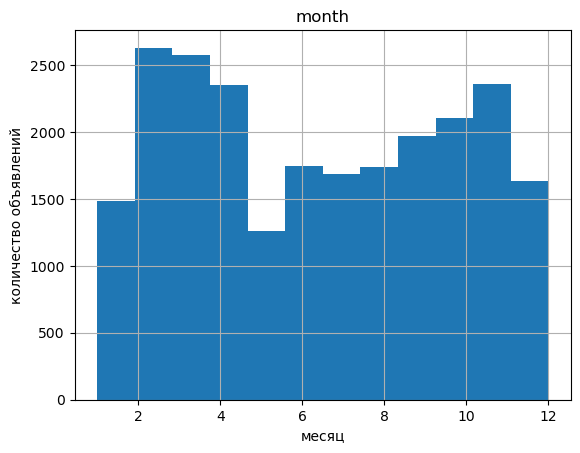

In [111]:
data.hist('month', bins=12)
plt.xlabel('месяц')
plt.ylabel('количество объявлений');

Очевидные провалы в подаче объявлений на новогодний и майские празники. Основные пики приходятся на февраль-апрель и сентябрь-ноябрью. Летом небольшой спад.

####  Изучим столбец 'days_exposition'

Для этого построим гистограмму 'days_exposition'

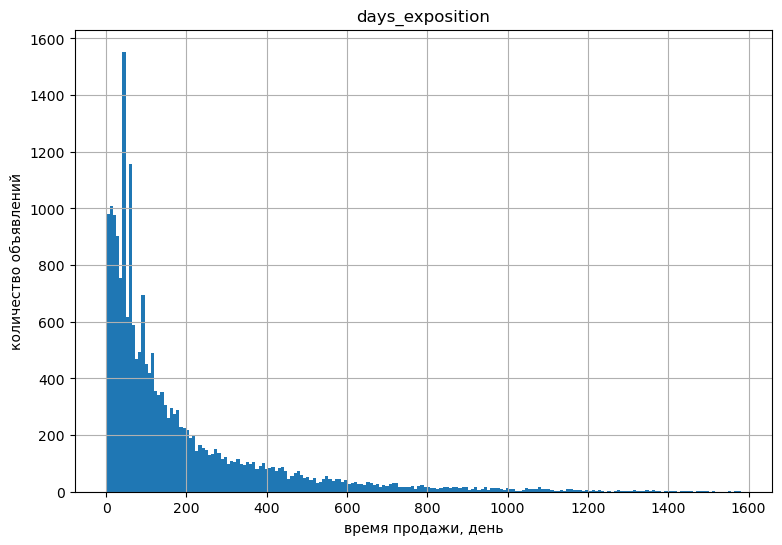

In [112]:
data.hist('days_exposition', bins=200, figsize=(9,6))
plt.xlabel('время продажи, день')
plt.ylabel('количество объявлений');


На графике заметны выбросы. Рассмотрим их подробнее.

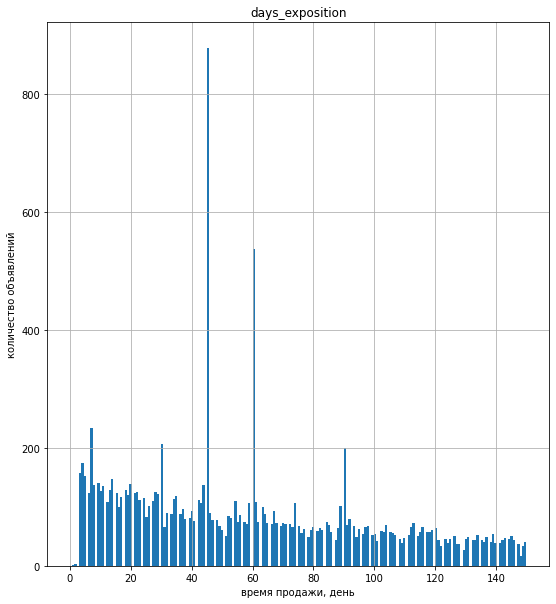

In [231]:
data.hist('days_exposition', bins=200, range=(0,150), figsize=(9,10))
plt.xlabel('время продажи, день')
plt.ylabel('количество объявлений');


Есть 3 пика закрытия объявлений на сайте - 45, 60 и 90 дней. Скорее всего это связано с работой сайта. Например, объявления надо просто активировать каждые 45, 60 и 90 дней. Неактивные объявления автоматически закрываются, если пользователь не пролонгирует время размещения через определёный срок. При этом рамещение или продление может быть платным.   
Быстрыми продажами можно назвать срок до 45 дней, 60-90  дней - пролонгируется намного меньше объявлений - относительно медленный период продажи. Объявления со сроком подачи более 90 дней можно считать долгим периодом продажи.

Посчитаем среднее значение и медиану по столбцу 'days_exposition'

In [113]:
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))

Среднее время продажи квартиры в днях: 180


In [114]:
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

Медианное время продажи квартиры в днях: 95


#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

*  Общая площадь

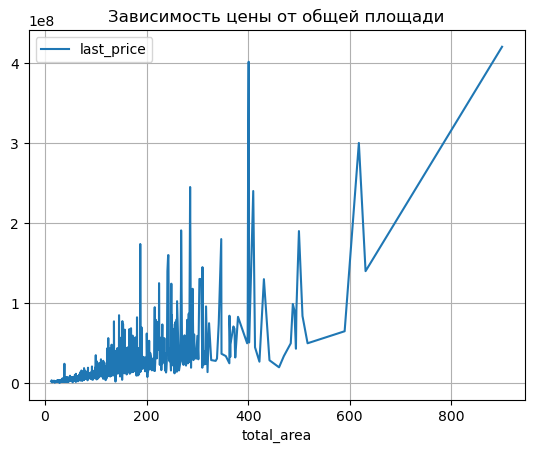

In [115]:
data.pivot_table(index='total_area',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от общей площади');

In [116]:
print('Коэффициент корреляции цены от общей площади', round(data['total_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от общей площади 0.65


Чем больше площадь, тем выше стоимость. Очень сильная зависимость цены от общей площади.

*  Жилая площадь

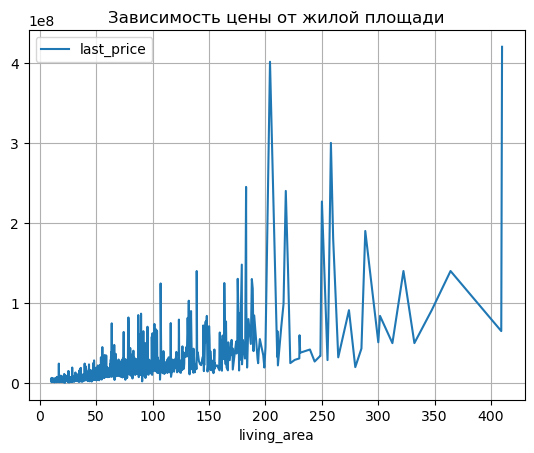

In [117]:
data.pivot_table(index='living_area',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от жилой площади');

In [118]:
print('Коэффициент корреляции цены от жилой площади', round(data['living_area'].corr(data['last_price']), 2));

Коэффициент корреляции цены от жилой площади 0.59


Зависимость ниже, чем общей площади.

*  Площадь кухни


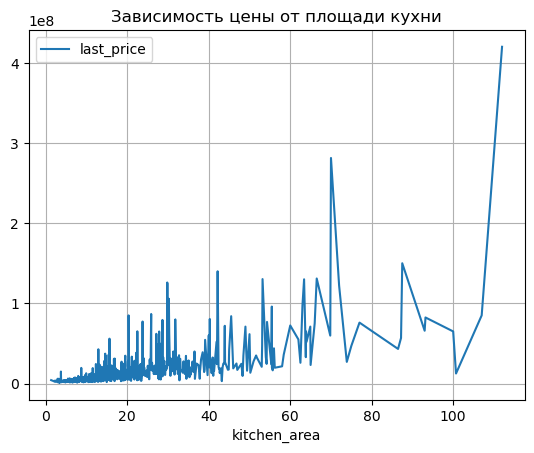

In [119]:
data.pivot_table(index='kitchen_area',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от площади кухни');

In [120]:
print('Коэффициент корреляции цены от площади кухни', round(data['kitchen_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от площади кухни 0.52


График и расчёт коррекляции показывают несильную зависимость цены от площади кухни.

*  Количество комнат

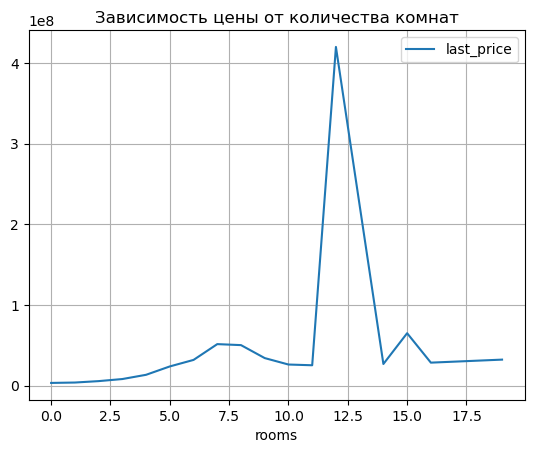

In [121]:
data.pivot_table(index='rooms',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от количества комнат');

In [122]:
print('Коэффициент корреляции цены от площади кухни', round(data['rooms'].corr(data['last_price']), 2))

Коэффициент корреляции цены от площади кухни 0.36


Число комнат не сильно влияет на цену. В тоже время , когда комнат больше 5, то разницаа в цене уже небольшая.

*  Тип этажа

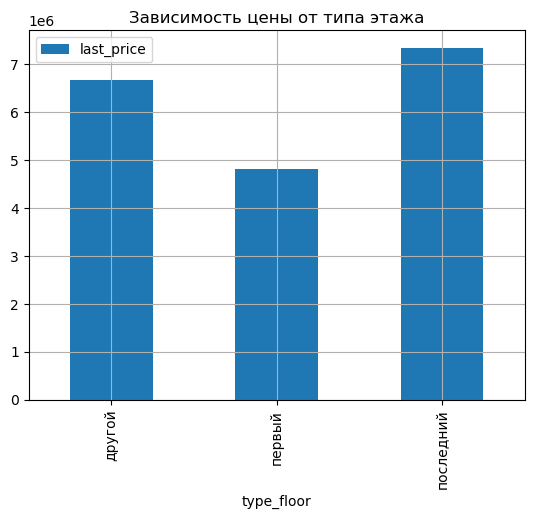

In [123]:
data.pivot_table(index='type_floor',values='last_price')\
.plot(y='last_price', kind='bar', grid=True, title='Зависимость цены от типа этажа');

Наблюдаем более низкую стоимость первых этажей по сравнению с остальными. Дороже последний этаж, скорее всего это пентхаусы. 

*  День недели

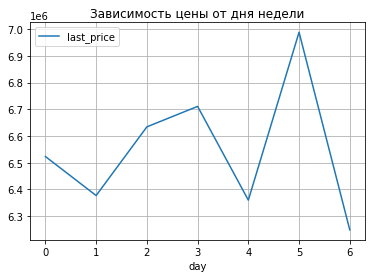

In [243]:
data.pivot_table(index='day',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от дня недели');

Дороже всего квартиры, опубликованные в субботу, дешевле всего - во вторник и пятницу.

*  Месяц

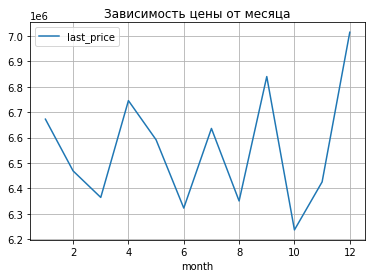

In [244]:
data.pivot_table(index='month',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от месяца');

На графике зависимости прослеживается сезонность. Видны пики повышения стоимости в новогодний период, в апреле, сентябре. На майские праздники и в октябре заметен спад цен.

* Год

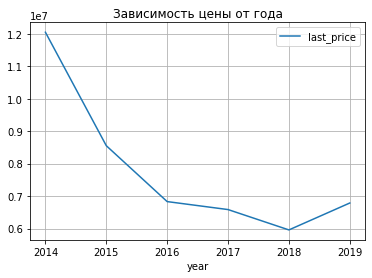

In [245]:
data.pivot_table(index='year',values='last_price')\
.plot(y='last_price', kind='line', grid=True, title='Зависимость цены от года');

Квартиры очень сильно подешевели до 2018 года, после подъема цен в 2014 году. К 2019 году цены снова стали повышаться.

####  Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [124]:
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10).round(2).sort_values(('mean', 'last_price'), ascending=False)

,count,mean
,last_price,last_price
locality_name,,
санкт-петербург,15621,8067909.28
пушкин,369,6469035.95
поселок парголово,327,4488074.80
деревня кудрово,299,4234157.93
поселок шушары,438,4109602.74
колпино,338,3964021.44
всеволожск,398,3789067.75
поселок мурино,551,3657101.51


Макcимальная средняя стоимость одного квадратного метра в Санкт-Петербурге, минимальная средняя стоимость - в Выборге.

#### Рассчитаем зависимость средней цены от близости к центру города

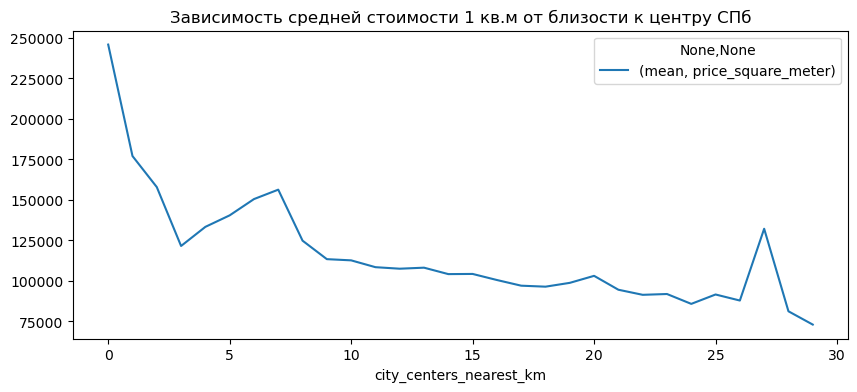

In [125]:
data[data['locality_name']=='санкт-петербург']\
.pivot_table(index='city_centers_nearest_km', values=['price_square_meter'], aggfunc=['mean'])\
.plot(style='-',title='Зависимость средней стоимости 1 кв.м от близости к центру СПб', figsize=(10,4));

В самом центре Санкт-Петербурга (радиус до 10 км) наблюдаем снижение средней стоимости 1 кв м недвижимости. Цена сильно снижается на расстоянии 3 км. Также наблюдаем 2 пика цен на расстоянии 7 км и 27 км.

### Общий вывод

Было проведено исследование, чтобы выявить интересные особенности и зависимости, которые существуют на рынке недвижимости.
Входные данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Выполнена предобработка данных. Проведена оптимизация типов данных. Заполнены пропуски данных там, где это было возможно.
Пропуски в столбце 'ceiling_height' заполнили медианным значением. В столбцах 'floors_total' и 'locality_name' пропущенных значений было мало, поэтому мы их удалили. Пропущенные показатели в столбцах  'parks_nearest', 'ponds_nearest', 'balcony' заполнили нулем. Пропуски в столбце 'is_apartment' заполнили False.   
Для заполнения пропусков в столбце 'living_area' посчитали соотношением медианной общей площади к медианной жилой. А затем, заполнили пропуски в столбце отношением общей площади к найденному соотношению. Таким же образом заполнили пропуски в столбце 'kitchen_area'.  
Не заполнялись пропуски по столбцам 'ponds_nearest' и 'parks_nearest', а также в столбце 'days_exposition', т.к. это невозможно.  
Для перечня локаций устранены неявные дубликаты в данном поле таблицы, а также все названия переведены к строичному рестру.  
Также, в рамках предобработки данных, также устранены некоторые редкие значения (выбросы). В столбце 'last_price' удалена цена 12190 за квартиру в Санкт-Петербурге 109 кв м. В столбце 'ceiling_height' заменили некоторые значения корректными. Удалили дома этажностью выше 37 этажей, их всего два - 52 и 60 этажей.  
  
В рамках проведенного исследования найдены определенные особенности и зависимости, существующие на рынке недвижимости региона.   
Большинство объявлений по квартирам с общей площадью от 31 до 45 кв м.   Также есть пик по квартирам 60 кв м. Большое количество объявлений по продаже квартир с жилой площадью 17-18 кв.м. и 30 кв.м Площадь кухни в объявлениях в основном от 5 до 11 кв м.    
Цена квартир в объявлениях в основном сосредотачивается в диапазоне от 2,5 до 6 мнл.  
Больше всего объявлений одно-, двух- и трёхкомнатных квартир, а также объявлений о продаже квартир на втором этаже. На первом и последнем этажах квартир меньше всего в объявлениях.  
В основном объявления подаются среди недели в рабочие дни. Возможно это связано с графиком работы агенств недвижимости. Очевидные провалы в подаче объявлений на новогодний и майские празники. Основные пики приходятся на февраль-апрель и сентябрь-ноябрью. Летом небольшой спад.  
Быстрыми продажами можно назвать срок до 45 дней, 60-90  дней - пролонгируется намного меньше объявлений - относительно медленный период продажи. Объявления со сроком подачи более 90 дней можно считать долгим периодом продажи.  
Чем больше площадь, тем выше стоимость. Очень сильная зависимость цены от общей площади. Коэффициент корреляции = 0.65 подтверждает наличие зависимости. Расчёт коррекляции показывает слабую зависимость цены от площади кухни и число комнат. В тоже время , когда комнат больше 5, то разница в цене уже небольшая.  

В рамках исследования рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Из представленных локаций макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге.  
Отдельно для Санкт-Петербурга рассчитана зависимость средней цены от близости к центру города. В самом центре Санкт-Петербурга (радиус до 10 км) наблюдаем снижение средней стоимости 1 кв м недвижимости. Цена сильно снижается на расстоянии 3 км. Также наблюдаем 2 пика цен на расстоянии 7 км и 27 км.


  

